In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load Dataset
df_name = ['sepal length',
           'sepal width',
           'petal length',
           'petal width',
           'class']
df_origin = pd.read_csv('dataset/iris.data', names=df_name)

df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Preprocessing
# Copy dataset
df = df_origin.copy()

# Delete class (species)
df.drop(columns='class', inplace=True)

# Check data NULL
print(df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64


In [4]:
def kmeans_silhouette_avg(cluster_list_tmp):
    # Store data for 'K average' scores per k
    score_tmp = []

    for i in cluster_list_tmp:
        # Instantiate the KMeans models
        km = KMeans(n_clusters=i, random_state=42)

        # Fit the KMeans model
        km.fit_predict(df)

        # Calculate Silhouette Score
        score_tmp.append(silhouette_score(df, km.labels_, metric="euclidean"))

    return score_tmp, np.mean(score_tmp)

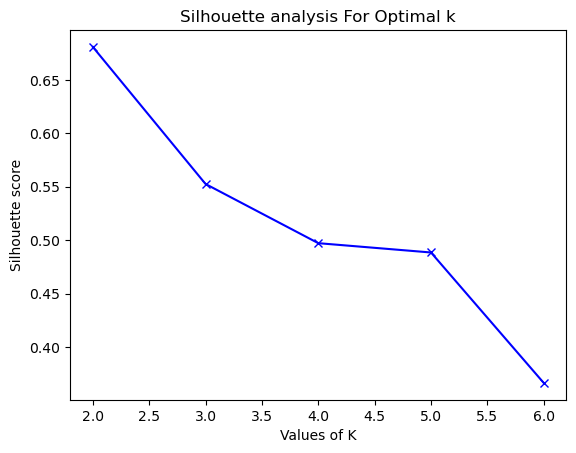

Average	score: 0.517
k: 2	score: 0.681
k: 3	score: 0.553
k: 4	score: 0.497
k: 5	score: 0.489
k: 6	score: 0.367


In [5]:
# Result
# Cluster list
cluster_list = [2, 3, 4, 5, 6]

score, avg = kmeans_silhouette_avg(cluster_list)

# Plotting silhouette score each k
plt.plot(cluster_list,score,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Print Average & scores per k
print('Average\tscore: {:.3f}'.format(avg))
for count, data in enumerate(cluster_list):
    print('k: {}\tscore: {:.3f}'.format(data, score[count]))